In [152]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [153]:
n_task_per_file = 50
n_files = 10
base_dir = "toy_stage2_full_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [154]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])
    print(pd.DataFrame(coverage_i).shape)
    print(pd.DataFrame(coverage_i).mean())

(46, 9)
1.0         0.808799
2.5         0.869876
Tree val    0.901760
Naive       0.664907
UV_0.1      0.890269
UV_0.2      0.905901
UV_0.3      0.893996
UV_0.4      0.917495
UV_0.5      0.916977
dtype: float64
(34, 9)
1.0         0.835154
2.5         0.860644
Tree val    0.940196
Naive       0.679272
UV_0.1      0.875070
UV_0.2      0.897199
UV_0.3      0.896218
UV_0.4      0.879272
UV_0.5      0.922689
dtype: float64
(50, 9)
1.0         0.808571
2.5         0.848000
Tree val    0.904190
Naive       0.655905
UV_0.1      0.906095
UV_0.2      0.932857
UV_0.3      0.908667
UV_0.4      0.914667
UV_0.5      0.863714
dtype: float64
(39, 9)
1.0         0.848474
2.5         0.882906
Tree val    0.914286
Naive       0.693162
UV_0.1      0.899512
UV_0.2      0.921490
UV_0.3      0.946764
UV_0.4      0.900366
UV_0.5      0.903297
dtype: float64
(13, 9)
1.0         0.841026
2.5         0.874725
Tree val    0.886447
Naive       0.682418
UV_0.1      0.960806
UV_0.2      0.935897
UV_0.3      0.9095

In [155]:
coverage_df = coverage_df.drop(["Tree val", "Naive"], axis=1)
coverage_df

,1.0,2.5,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,0.857143,1.000000,1.000000,0.833333,1.000000,0.857143,1.000000
1,0.833333,1.000000,1.000000,1.000000,0.833333,1.000000,1.000000
2,0.833333,0.833333,1.000000,1.000000,0.833333,1.000000,0.833333
3,0.833333,0.833333,0.833333,0.833333,0.833333,0.833333,0.666667
4,0.800000,1.000000,0.600000,1.000000,1.000000,0.800000,1.000000
...,...,...,...,...,...,...,...
45,0.666667,0.666667,1.000000,0.666667,0.666667,0.500000,0.666667
46,1.000000,1.000000,0.833333,0.833333,1.000000,0.833333,0.666667
47,1.000000,1.000000,1.000000,0.833333,1.000000,0.833333,1.000000
48,0.833333,0.666667,0.833333,0.833333,1.000000,1.000000,1.000000


In [156]:
length_df = length_df.drop(["Tree val", "Naive"], axis=1)
length_df

,1.0,2.5,UV_0.1,UV_0.2,UV_0.3,UV_0.4,UV_0.5
0,1.289181,1.174673,3.890800,2.860750,2.452458,2.344923,2.146612
1,1.194955,1.176845,3.905280,2.862596,2.463473,2.221746,2.037130
2,1.191556,1.168485,3.874596,2.861579,2.440683,2.185567,2.023442
3,1.161096,1.153673,3.835782,2.873993,2.457208,2.152446,2.076211
4,1.072509,1.081741,3.621294,2.642195,2.218952,2.015612,1.839041
...,...,...,...,...,...,...,...
45,1.197410,1.166598,3.861068,2.907535,2.435860,2.225041,2.041188
46,1.203188,1.175722,3.866978,2.877495,2.401313,2.204127,1.987049
47,1.229077,1.154284,3.903410,2.849240,2.519658,2.234219,1.829971
48,1.207251,1.222451,3.868177,2.859682,2.591912,2.251639,2.057316


In [157]:
MSE_df = MSE_df.drop(["Tree val", "Naive"], axis=1)

In [158]:
MSE_df.mean()

1.0       4.709325
2.5       4.849494
UV_0.1    4.713249
UV_0.2    4.777639
UV_0.3    4.838332
UV_0.4    4.894659
UV_0.5    4.948614
dtype: float64

In [159]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,6.5)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=2)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_72484/1924133983.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_72484/1924133983.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_72484/1924133983.py:13: UserWarning: 
The palette list has fewer values (6) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False)


Coverage :
 RRT(1)      0.826266
RRT(2.5)    0.852907
UV(0.1)     0.904749
UV(0.2)     0.907118
UV(0.3)     0.905564
UV(0.4)     0.897870
UV(0.5)     0.902431
dtype: float64
Length :
 RRT(1)      1.193013
RRT(2.5)    1.170213
UV(0.1)     3.890277
UV(0.2)     2.873688
UV(0.3)     2.432353
UV(0.4)     2.187810
UV(0.5)     2.027759
dtype: float64
MSE :
 RRT(1)      4.709325
RRT(2.5)    4.849494
UV(0.1)     4.713249
UV(0.2)     4.777639
UV(0.3)     4.838332
UV(0.4)     4.894659
UV(0.5)     4.948614
dtype: float64


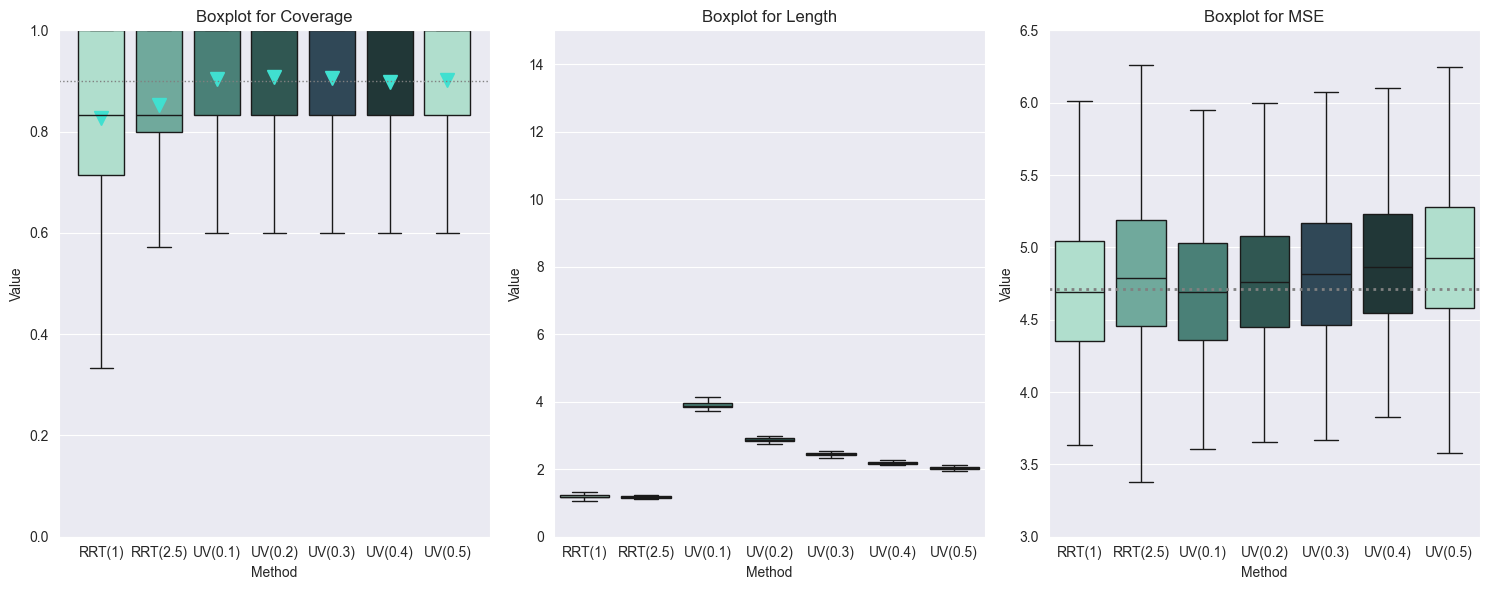

In [160]:
boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=15,
         len_baseline_key="RRT(1)",
         MSE_baseline_key="RRT(1)",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["RRT(1)", "RRT(2.5)", "UV(0.1)", "UV(0.2)", "UV(0.3)", "UV(0.4)", "UV(0.5)"], 
         palette=["#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D", "#1E3A3A"])